## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [1]:
#Tensorflow 설치하기
# %pip install tensorflow

* 데이터 프레임 관련 라이브러리

In [48]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import statsmodels.api as sm

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import * # scaler
import joblib

### **나.  학습데이터 불러오기**

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_tree

In [4]:
data = pd.read_csv('My_dataset.csv')

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.head()

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_ip_present,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,-1
1,0.0,58.0,17.0,17.0,6.0,0.0,0.0,18.0,0.0,0.0,20.0,0.0,21.0,1
2,0.0,4.0,16.0,16.0,2.0,0.0,0.0,33.0,0.0,0.0,101.0,3.0,70.0,1
3,0.0,13.0,14.0,14.0,3.0,0.0,0.0,15.0,0.0,0.0,151.0,1.0,55.0,1
4,2.0,12.0,27.0,27.0,2.0,0.0,0.0,10.0,0.0,0.0,332.0,0.0,321.0,1


In [7]:
data.shape

(3231, 14)

### **다.  데이터 전처리**

In [8]:
target = 'Result_v1'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [9]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3)

In [10]:
# train_test_split 사용

In [11]:
Scaler = MinMaxScaler()
x_train_s = Scaler.fit_transform(x_train)
x_val_s = Scaler.transform(x_val)

In [50]:
x_train.head()

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_ip_present,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('form'),html_num_tags('a')
82,0.0,0.0,17.0,14.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
444,3.0,1.0,45.0,45.0,1.0,0.0,0.0,2.0,0.0,0.0,41.0,1.0,16.0
2020,0.0,5.0,10.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21.0
805,2.0,19.0,29.0,29.0,1.0,0.0,0.0,39.0,0.0,0.0,124.0,4.0,35.0
486,0.0,29.0,16.0,16.0,2.0,0.0,0.0,13.0,0.0,0.0,24.0,1.0,18.0


In [51]:
x_train.shape

(2261, 13)

### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [12]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [13]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


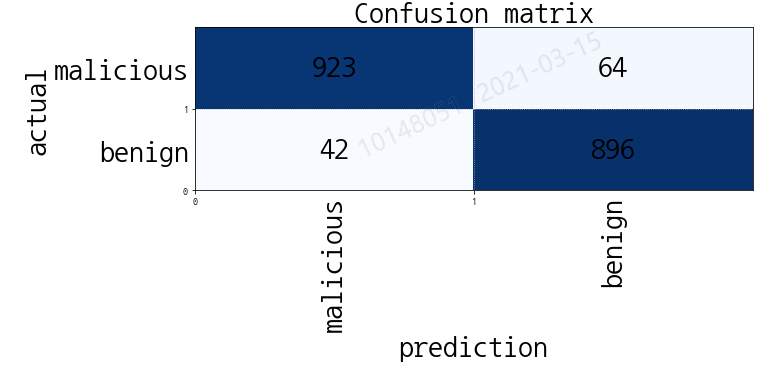

---

In [14]:
# 아래 함수는 로지스틱 회귀를 위한 전진선택법 함수 입니다.
import statsmodels.api as sm

def forward_stepwise_logistic(x_train, y_train):

    # 변수목록, 선택된 변수 목록, 단계별 모델과 AIC 저장소 정의
    features = list(x_train)
    selected = []
    step_df = pd.DataFrame({ 'step':[], 'feature':[],'aic':[]})

    # 
    for s in range(0, len(features)) :
        result =  { 'step':[], 'feature':[],'aic':[]}

        # 변수 목록에서 변수 한개씩 뽑아서 모델에 추가
        for f in features :
            vars = selected + [f]
            x_tr = x_train[vars]
            model = sm.Logit(y_train, x_tr).fit()
            result['step'].append(s+1)
            result['feature'].append(vars)
            result['aic'].append(model.aic)
        
        # 모델별 aic 집계
        temp = pd.DataFrame(result).sort_values('aic').reset_index(drop = True)

        # 만약 이전 aic보다 새로운 aic 가 크다면 멈추기
        if step_df['aic'].min() < temp['aic'].min() :
            break
        step_df = pd.concat([step_df, temp], axis = 0).reset_index(drop = True)

        # 선택된 변수 제거
        v = temp.loc[0,'feature'][s]
        features.remove(v)

        selected.append(v)
    
    # 선택된 변수와 step_df 결과 반환
    return selected, step_df

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

In [15]:
# 1. import



In [16]:
# 2.선언 
model1 = LogisticRegression()

In [17]:
params2 = {'max_depth' : range(3,6), 'min_samples_leaf' : range(1, 121, 5)}
model2 = GridSearchCV(RandomForestClassifier(), params2, cv=10)

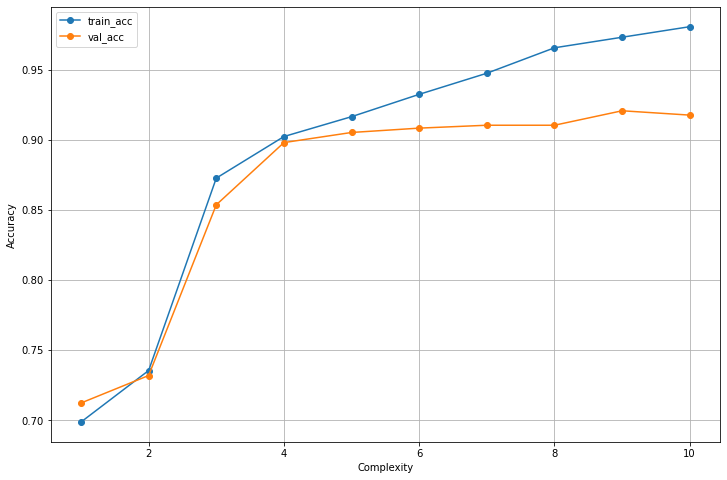

In [18]:
result_train = [] # train set을 가지고 예측한 결과
result_val = [] # val set을 가지고 예측한 결과
depth = list(range(1,11))

for d in depth :
    model3 = DecisionTreeClassifier(max_depth = d)
    model3.fit(x_train, y_train)
    pred_tr, pred_val = model3.predict(x_train), model3.predict(x_val)
    result_train.append(accuracy_score(y_train, pred_tr))
    result_val.append(accuracy_score(y_val, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, result_train, label = 'train_acc', marker = 'o')
plt.plot(depth, result_val, label = 'val_acc', marker = 'o')

plt.title(DecisionTreeClassifier)
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

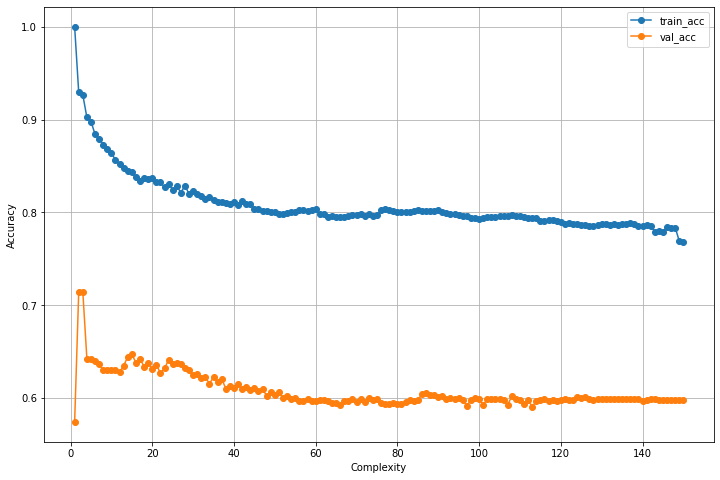

In [19]:
rs_train = []
rs_val = []
depth = list(range(1,151))

for d in depth :
    model = KNeighborsClassifier(n_neighbors=d)
    model.fit(x_train_s, y_train)
    pred_tr, pred_val = model.predict(x_train_s), model.predict(x_val)
    rs_train.append(accuracy_score(y_train, pred_tr))
    rs_val.append(accuracy_score(y_val, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, rs_train, label = 'train_acc', marker = 'o')
plt.plot(depth, rs_val, label = 'val_acc', marker = 'o')

plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [34]:
y_train.replace({-1:0})

82      1
444     0
2020    1
805     1
486     1
       ..
602     0
622     0
1839    1
365     0
2447    0
Name: Result_v1, Length: 2261, dtype: int64

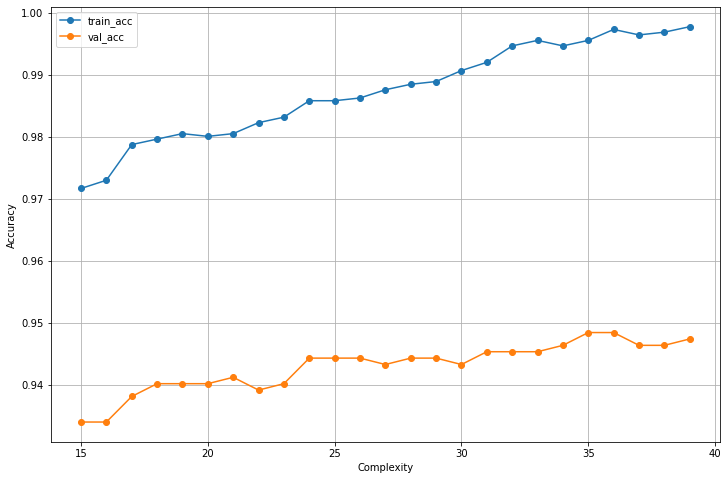

In [40]:
rs_train = []
rs_val = []
depth = list(range(15,40))
y_train.replace({-1:0}, inplace=True)
y_val.replace({-1:0}, inplace=True)
for d in depth :
    model = XGBClassifier(n_estimators = d)
    model.fit(x_train, y_train)
    pred_tr, pred_val = model.predict(x_train), model.predict(x_val)
    rs_train.append(accuracy_score(y_train, pred_tr))
    rs_val.append(accuracy_score(y_val, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, rs_train, label = 'train_acc', marker = 'o')
plt.plot(depth, rs_val, label = 'val_acc', marker = 'o')

plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

y_train.replace({0:-1}, inplace=True)
y_val.replace({0:-1}, inplace=True)

In [20]:
params3 = {'n_neighbors' : range(17,25)}
model3 = GridSearchCV(KNeighborsClassifier(),params3, cv=10)

In [41]:
params4 = {'n_estimators' : range(20, 26)}
model4 = GridSearchCV(XGBClassifier(), params4, cv=10)

In [57]:
model4_1 = XGBClassifier(n_estimators = 21)
y_train.replace({-1:0}, inplace=True)
model4_1.fit(x_train, y_train)
pred4_1 = model4_1.predict(x_val)
y_train.replace({0:-1}, inplace=True)

In [21]:
# 3. fit(), 학습
model1.fit(x_train, y_train)

LogisticRegression()

In [22]:
# 3. fit(), 학습
model2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(3, 6),
                         'min_samples_leaf': range(1, 121, 5)})

In [23]:
model3.fit(x_train_s, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(17, 25)})

In [43]:
y_train.replace({-1:0}, inplace=True)
model4.fit(x_train, y_train)
y_train.replace({0:-1}, inplace=True)

In [24]:
print(model2.best_params_)
print(model2.best_score_)

{'max_depth': 5, 'min_samples_leaf': 1}
0.9159779345834471


In [25]:
print(model3.best_params_)
print(model3.best_score_)

{'n_neighbors': 18}
0.8208705313632997


In [54]:
print(model4.best_params_)
print(model4.best_score_)

{'n_estimators': 21}
0.9451639312307514


In [26]:
# 4. predict(), 예측
pred1 = model1.predict(x_val)

In [27]:
pred2 = model2.predict(x_val)

In [29]:
pred3 = model3.predict(x_val_s)

In [44]:
pred4 = model4.predict(x_val)

In [45]:
# train 및 val 데이터 정확도 확인 
print(accuracy_score(y_val,pred1))
print(accuracy_score(y_val,pred2))
print(accuracy_score(y_val,pred3))
y_val.replace({-1:0}, inplace=True)
print(accuracy_score(y_val,pred4))
y_val.replace({0:-1}, inplace=True)

0.8092783505154639
0.9164948453608247
0.8030927835051547
0.9412371134020618


In [46]:
# Test 데이터 결과 Confusion Matrix 확인
print(confusion_matrix(y_val, pred1))
print(classification_report(y_val, pred1))
print(confusion_matrix(y_val, pred2))
print(classification_report(y_val, pred2))
print(confusion_matrix(y_val, pred3))
print(classification_report(y_val, pred3))
y_val.replace({-1:0}, inplace=True)
print(confusion_matrix(y_val, pred4))
print(classification_report(y_val, pred4))
y_val.replace({0:-1}, inplace=True)

[[401  94]
 [ 91 384]]
              precision    recall  f1-score   support

          -1       0.82      0.81      0.81       495
           1       0.80      0.81      0.81       475

    accuracy                           0.81       970
   macro avg       0.81      0.81      0.81       970
weighted avg       0.81      0.81      0.81       970

[[447  48]
 [ 33 442]]
              precision    recall  f1-score   support

          -1       0.93      0.90      0.92       495
           1       0.90      0.93      0.92       475

    accuracy                           0.92       970
   macro avg       0.92      0.92      0.92       970
weighted avg       0.92      0.92      0.92       970

[[407  88]
 [103 372]]
              precision    recall  f1-score   support

          -1       0.80      0.82      0.81       495
           1       0.81      0.78      0.80       475

    accuracy                           0.80       970
   macro avg       0.80      0.80      0.80       970
weigh

In [52]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

In [58]:
# Feature(특징)별 가중치 확인
print(model4_1.feature_importances_)


[0.04211339 0.09711827 0.02188237 0.45472908 0.04423339 0.03603897
 0.03534532 0.03107825 0.         0.01839952 0.02825711 0.10712468
 0.08367966]


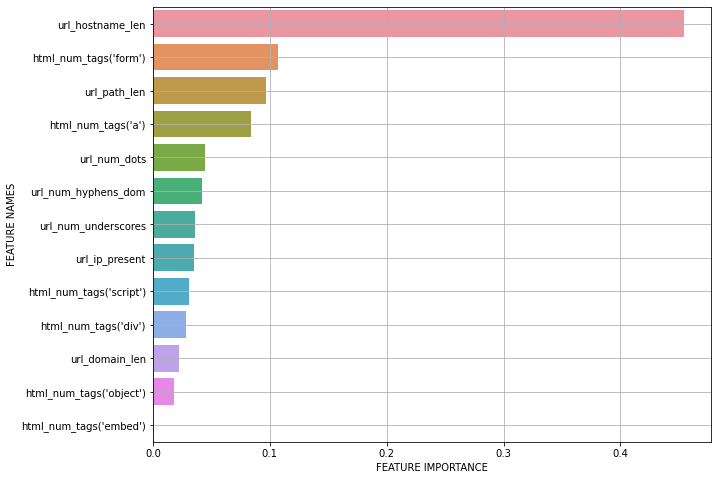

In [59]:
result = plot_feature_importance(model4_1.feature_importances_, x_train.columns)

In [49]:
joblib.dump(model4, './XGB_model.pkl')

['./XGB_model.pkl']

In [ ]:
result = plot_feature_importance(model.feature_importances_, x_train.columns)